### Boston Housing dataset

In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [2]:
import pandas as pd

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston['MEDV'] = boston_dataset.target

Linear models

In [4]:
import numpy as np

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = lin_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 31.777227140320218
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
MSE is 26.392886822666085
R2 score is 0.6628996975186953


Polynomial

In [8]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train) 
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    y_train_predicted = poly_model.predict(X_train_poly)
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    mse_train = mean_squared_error(Y_train, y_train_predicted)
    r2_train = r2_score(Y_train, y_train_predicted)
    
    mse_test = mean_squared_error(Y_test, y_test_predict)
    r2_test = r2_score(Y_test, y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("MSE of training set is {}".format(mse_train))
    print("R2 score of training set is {}".format(r2_train))
    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("MSE of test set is {}".format(mse_test))
    print("R2 score of test set is {}".format(r2_test))

In [9]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
MSE of training set is 22.11887709298093
R2 score of training set is 0.7425094297364767


The model performance for the test set
-------------------------------------------
MSE of test set is 14.324861558447438
R2 score of test set is 0.8170372495892191


Various models

In [10]:
import pandas as pd
from sklearn.datasets import load_boston

pd.options.display.float_format = '{:,.2f}'.format
dataset = load_boston()
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df["PRICE"] = dataset.target

X = df.drop("PRICE", axis=1)
Y = df["PRICE"]

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Linear: -23.794, 12.358
Lasso: -63.82, 20.646
ElasticNet: -69.362, 21.371
KNN: -26.366, 16.169
DecisionTree: -21.732, 12.212
SVR: -34.845, 17.408
AdaBoost: -14.918, 7.53
GradientBoost: -10.228, 5.078
RandomForest: -12.117, 6.594
ExtraTrees: -11.282, 7.76


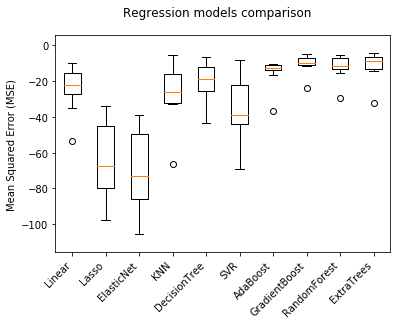

In [13]:
import warnings

warnings.filterwarnings(action='ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

folds   = 10
metric  = "neg_mean_squared_error"

models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

model_results = []
model_names   = []

for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

In [14]:
best_model = GradientBoostingRegressor(random_state=seed)
best_model.fit(X_train, Y_train)
predictions = best_model.predict(X_test)

print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))

[INFO] MSE : 10.292


Comment

Testing various methods based on mse, I guess gradientboost method is the best.

### Fuel Consumption dataset

Linear models

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.00,4,AS5,Z,9.90,6.70,8.50,33,196
1,2014,ACURA,ILX,COMPACT,2.40,4,M6,Z,11.20,7.70,9.60,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.50,4,AV7,Z,6.00,5.80,5.90,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.50,6,AS6,Z,12.70,9.10,11.10,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.50,6,AS6,Z,12.10,8.70,10.60,27,244


In [16]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.00,4,8.50,196
1,2.40,4,9.60,221
2,1.50,4,5.90,136
3,3.50,6,11.10,255
4,3.50,6,10.60,244
5,3.50,6,10.00,230
6,3.50,6,10.10,232
7,3.70,6,11.10,255
8,3.70,6,11.60,267


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.11922692]]
Intercept:  [124.79714446]


In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.26
Residual sum of squares (MSE): 875.11
R2-score: 0.73


In [20]:
df = pd.read_csv('FuelConsumptionCo2.csv')
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

In [21]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[10.21771637  7.61768101  9.87541369]]


In [22]:
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y))

Residual sum squares: 558.48
Variance score: 0.86


In [23]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.27777819  7.32206707  6.17940391  3.45415328]]
Residual sum of squares: 556.57
Variance score: 0.86


Polynomial

In [24]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [26]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.07708813 -1.34734542]]
Intercept:  [109.72491895]


In [27]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.95
Residual sum of squares (MSE): 1016.02
R2-score: 0.66


Various models

Linear: -942.889, 201.299
Lasso: -943.019, 201.73
ElasticNet: -1065.169, 262.13
KNN: -1091.96, 259.097
DecisionTree: -1069.941, 241.993
SVR: -1206.391, 212.698
AdaBoost: -998.949, 152.848
GradientBoost: -1021.541, 178.048
RandomForest: -1021.991, 151.843
ExtraTrees: -1048.67, 238.588


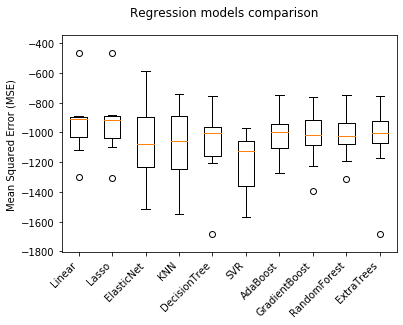

In [28]:
import warnings

warnings.filterwarnings(action='ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

folds   = 10
metric  = "neg_mean_squared_error"

models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

model_results = []
model_names   = []

for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, train_x, train_y, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

In [29]:
model1 = AdaBoostRegressor(random_state=seed)
model1.fit(train_x, train_y)
predictions = model1.predict(test_x)

print("[INFO] MSE : {}".format(round(mean_squared_error(test_y, predictions), 3)))

[INFO] MSE : 929.931


Comments

Testing various methods based on mse, I guess linear regression method is the best.